<a href="https://colab.research.google.com/github/CosminUT/MatchingDay/blob/main/Matching_day_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro
In the code below, you will be able to see what the database you designed looks like after 20 days of system operation. \\
You don't have to write new code yourself, but feel free to modify the queries as you see fit to get different views of the data and solve the assignments.

First thing we do is we install a library to be able to access our database remotely.\\
You can run this cell and remaining cells by pressing the play button on the side of the cell.

In [ ]:
!pip install psycopg2-binary


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.6 MB/s eta 0:00:00


We then create a connection tunnel through which we can send and receive data from the server.

In [ ]:
import psycopg2
import pandas as pd

# Defining our connecttion data
host = 'bronto.ewi.utwente.nl'
dbname = 'dab_di23242b_0'
user = 'dab_di23242b_0'
password = 'S6yoQMqU4lLr6P+W'
port = '5432'

# Establish a connection to the PostgreSQL database on the university's server
conn = psycopg2.connect(
    host=host,
    dbname=dbname,
    user=user,
    password=password,
    port=port
)

# Create a cursor object
cursor = conn.cursor()


Remember now the tables you defined in the previous exercise.

Below, we're asking for the eventname and eventdate.

Modify the query to ask for eventname, eventdate and location. You can achieve this by adding a comma after event date and adding the new attribute you want to see in the results.

In [ ]:
# Fetch all events
query = 'SELECT eventname, eventdate FROM "Events"."events";'

Run the cell below to see the result of your query.

You should be able to see the event name, the event date and the location.

In [ ]:

conn.commit()
cursor.execute(query)
events = cursor.fetchall()
events_df = pd.DataFrame(events, columns=[desc[0] for desc in cursor.description])
events_df.head(5)

The below query now shows all data in the customers table.

Modify it so that it doesn't show the customerid anymore.

In [ ]:
# Fetch all customers
query = 'SELECT * FROM "Events"."customers";'

In [ ]:

conn.commit()
cursor.execute(query)
customers = cursor.fetchall()
customers_df = pd.DataFrame(customers, columns=[desc[0] for desc in cursor.description])
customers_df.head(10)

Below, we also show all the tickets sold and by whom.

You can focus on what tickets a single customer has bought by adding the following to the query

**WHERE customerid=1"

Add it before the semicolon;

In [ ]:
# Fetch all tickets
query = 'SELECT * FROM "Events"."tickets" ;'
conn.commit()
cursor.execute(query)
tickets = cursor.fetchall()
tickets_df = pd.DataFrame(tickets, columns=[desc[0] for desc in cursor.description])
tickets_df.head(100)

The query below is a little bit more complex. We will now show the event that sold the most ticket.

You can play with the code by changing the limit value from 1 to 3 to show the top 3 events for example.

In [ ]:
# Query to find the event that sold the most tickets
query = '''
SELECT
    "eventname", "ticketssold"
FROM
    "Events"."events"
ORDER BY
    "ticketssold" DESC
LIMIT 1;
'''
conn.commit()
cursor.execute(query)
most_sold_event = cursor.fetchall()
most_sold_event_df = pd.DataFrame(most_sold_event, columns=[desc[0] for desc in cursor.description])
most_sold_event_df

Now, let's try to do the 3 tasks that you can also find at the end of Exercise 3!

In [ ]:
#1. All events:
query = 'SELECT  FROM "Events"."your_text";'
conn.commit()
cursor.execute(query)
events1 = cursor.fetchall()
events1_df = pd.DataFrame(events1, columns=[desc[0] for desc in cursor.description])
events1_df.head(10)




In [ ]:
#2. All tickets for the event with ID 2
query = 'SELECT * FROM "Events"."your_text" WHERE ;'
conn.commit()
cursor.execute(query)
tickets2 = cursor.fetchall()
tickets2_df = pd.DataFrame(tickets2, columns=[desc[0] for desc in cursor.description])
tickets2_df.head(10)

In [ ]:
#3. All tickets purchased by the customer called ‘Cathy Brown’:
# Here you will have to use 'c.attribute' when reffering to an attribute of customers, so if you want to choose the name you write 'c.name'
# Same goes for tickets (ex: t.customerid)
query = '''
SELECT
    *
FROM
     "Events".tickets t, "Events".customers c
WHERE
    -fill_this_in-;
'''
conn.commit()
cursor.execute(query)
tickets2 = cursor.fetchall()
tickets2_df = pd.DataFrame(tickets2, columns=[desc[0] for desc in cursor.description])
tickets2_df.head(10)

##Visualizations

It's great to look at data in a textual form. But to analyze the trends in data, textual form is rarely helpful. We will instead invest in visualizing data as graphs and see what we can derive from it.

Let's start by looking at the number of tickets sold per event as a bar graph.

<ipython-input-9-c80616235cbc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='eventname', y='ticketssold', data=events_df, palette='viridis')


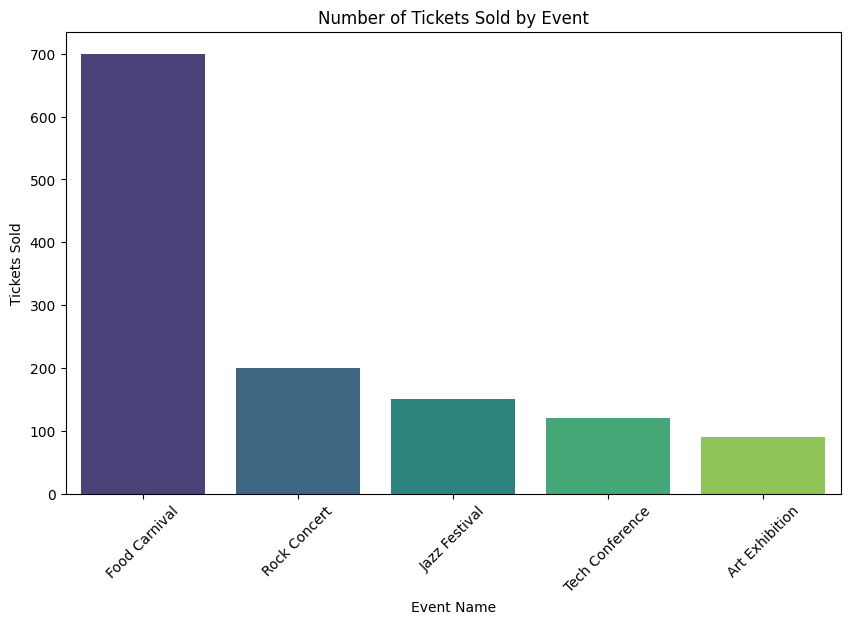

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Query to fetch event names and number of tickets sold
query = '''
SELECT
    "eventname", "ticketssold"
FROM
    "Events"."events"
ORDER BY
    "ticketssold" DESC;
'''
conn.commit()
cursor.execute(query)
events = cursor.fetchall()
events_df = pd.DataFrame(events, columns=[desc[0] for desc in cursor.description])


# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='eventname', y='ticketssold', data=events_df, palette='viridis')
plt.xlabel('Event Name')
plt.ylabel('Tickets Sold')
plt.title('Number of Tickets Sold by Event')
plt.xticks(rotation=45)
plt.show()

Let's now look at the tocket sales within date intervals.

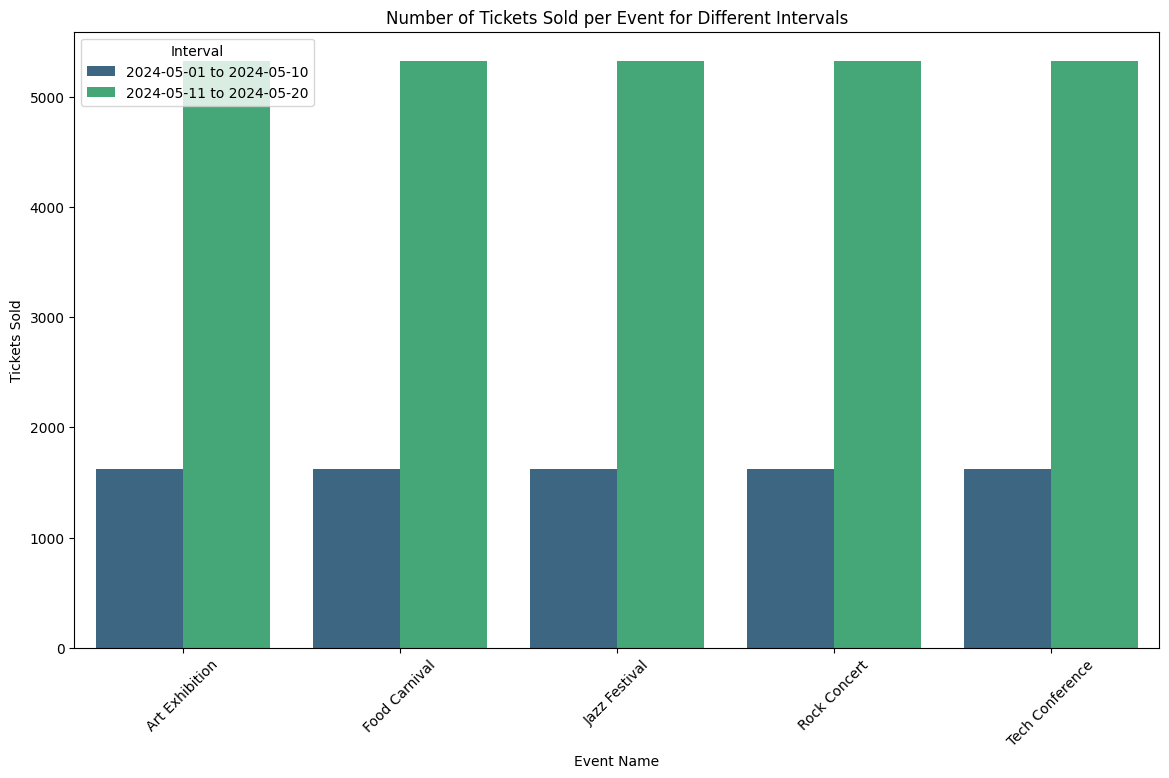

In [ ]:
# Query to fetch event names, purchase dates, and quantity
query = '''
SELECT
    e."eventname", t."purchasedate", t."quantity"
FROM
    "Events"."tickets" t
JOIN
    "Events"."events" e ON t."eventid" = e."eventid";
'''
conn.commit()
cursor.execute(query)
tickets = cursor.fetchall()
tickets_df = pd.DataFrame(tickets, columns=[desc[0] for desc in cursor.description])


# Convert purchasedate to datetime
tickets_df['purchasedate'] = pd.to_datetime(tickets_df['purchasedate'])

# Define the intervals
intervals = [
    ('2024-05-01', '2024-05-10'),
    ('2024-05-11', '2024-05-20'),
    ('2024-05-21', '2024-05-31') #this one will not appear since there is no data for this interval
]

# Add interval column to the dataframe
def assign_interval(date):
    for start, end in intervals:
        if pd.Timestamp(start) <= date <= pd.Timestamp(end):
            return f'{start} to {end}'
    return 'Outside intervals'

tickets_df['interval'] = tickets_df['purchasedate'].apply(assign_interval)

# Group by eventname and interval and sum the quantities
grouped_df = tickets_df.groupby(['eventname', 'interval']).agg({'quantity': 'sum'}).reset_index()

# Plotting the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='eventname', y='quantity', hue='interval', data=grouped_df, palette='viridis')
plt.xlabel('Event Name')
plt.ylabel('Tickets Sold')
plt.title('Number of Tickets Sold per Event for Different Intervals')
plt.xticks(rotation=45)
plt.legend(title='Interval')
plt.show()


Let's now see how the sales have increased over the 20 days that our business was operational?
What was the increase rate between the 5th and 10th of May?

<ipython-input-23-4f176dade18c>:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='purchasedate', y='quantity', data=daily_sales_df, palette='viridis')


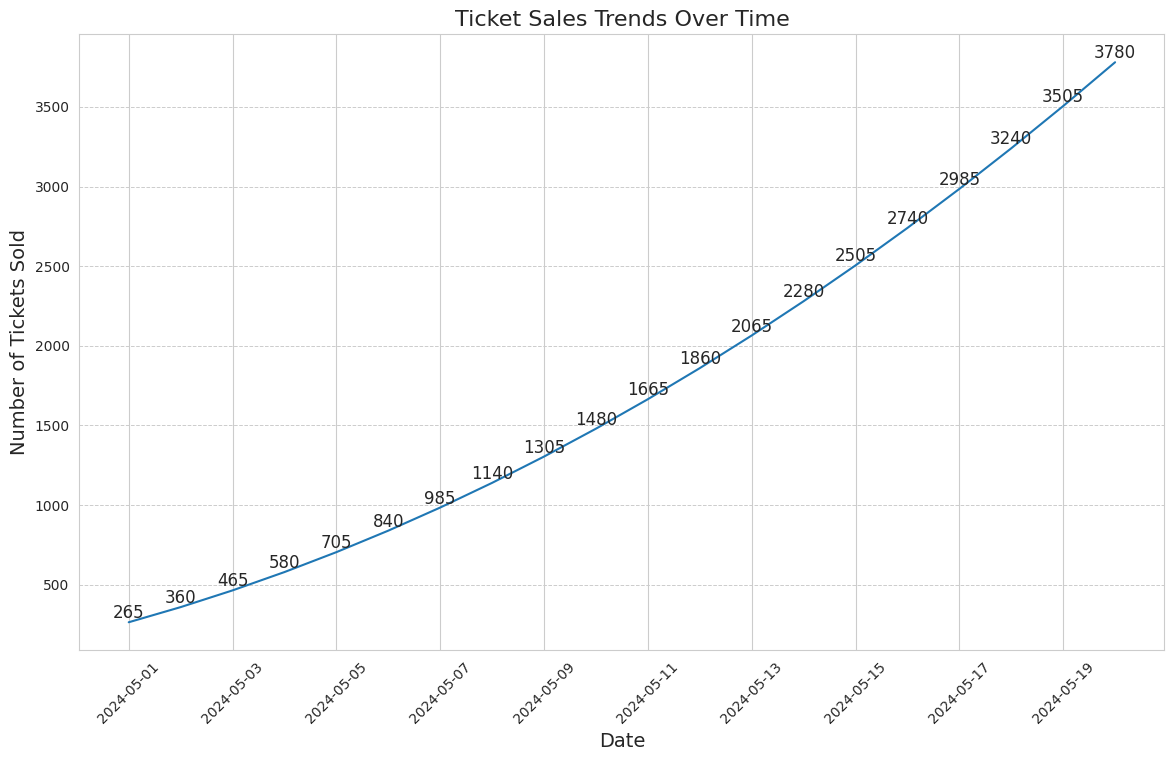

In [ ]:
# Query to fetch event names, purchase dates, and quantity
query = '''
SELECT
    e."eventname", t."purchasedate", t."quantity"
FROM
    "Events"."tickets" t
JOIN
    "Events"."events" e ON t."eventid" = e."eventid";
'''
conn.commit()
cursor.execute(query)
tickets = cursor.fetchall()
tickets_df = pd.DataFrame(tickets, columns=[desc[0] for desc in cursor.description])


# Convert purchasedate to datetime
tickets_df['purchasedate'] = pd.to_datetime(tickets_df['purchasedate'])

# Aggregate data to get the number of tickets sold per day
daily_sales_df = tickets_df.groupby('purchasedate').agg({'quantity': 'sum'}).reset_index()
daily_sales_df = daily_sales_df.sort_values('purchasedate')

# Line chart with value labels
plt.figure(figsize=(14, 8))
sns.lineplot(x='purchasedate', y='quantity', data=daily_sales_df, palette='viridis')

# Add value labels to each data point
for i, row in daily_sales_df.iterrows():
  plt.text(row['purchasedate'], row['quantity'], str(row['quantity']), ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tickets Sold', fontsize=14)
plt.title('Ticket Sales Trends Over Time', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.show()

Compute the change now by deriving the function that fits the sale.

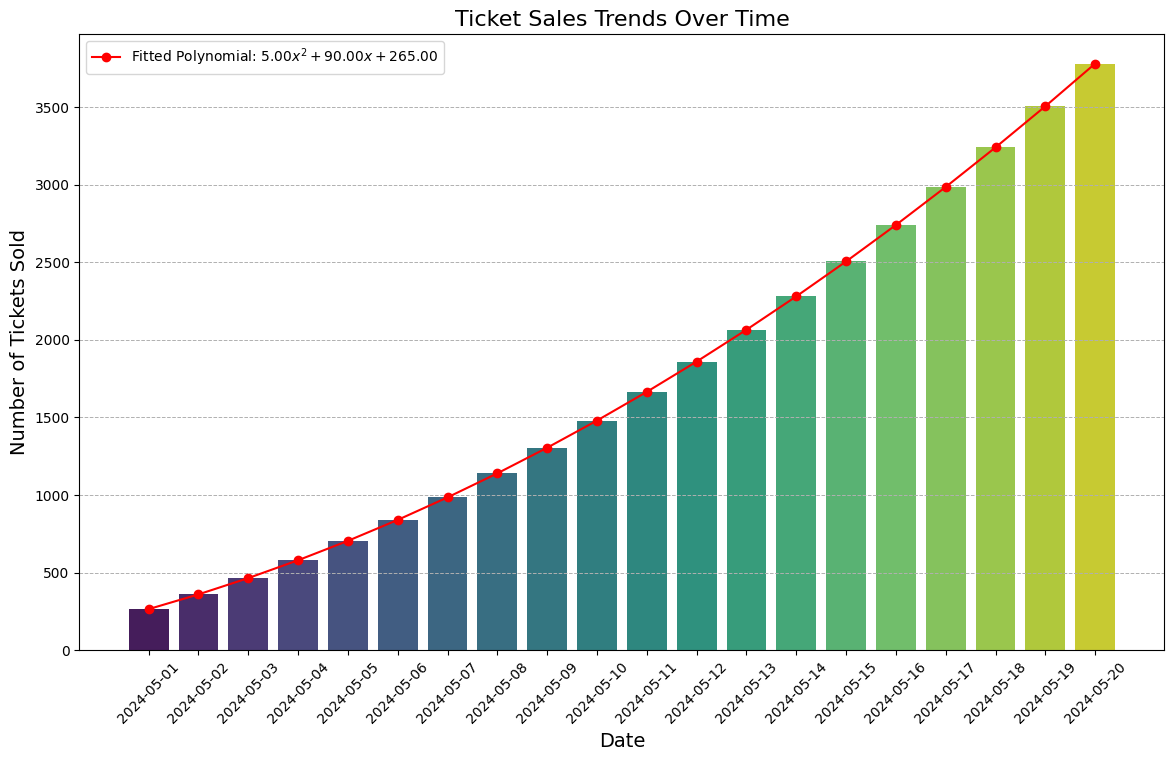

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Query to fetch event names, purchase dates, and quantity
query = '''
SELECT
    e."eventname", t."purchasedate", t."quantity"
FROM
    "Events"."tickets" t
JOIN
    "Events"."events" e ON t."eventid" = e."eventid";
'''
conn.commit()
cursor.execute(query)
tickets = cursor.fetchall()
tickets_df = pd.DataFrame(tickets, columns=[desc[0] for desc in cursor.description])

# Convert purchasedate to datetime
tickets_df['purchasedate'] = pd.to_datetime(tickets_df['purchasedate'])

# Aggregate data to get the number of tickets sold per day
daily_sales_df = tickets_df.groupby('purchasedate').agg({'quantity': 'sum'}).reset_index()
daily_sales_df = daily_sales_df.sort_values('purchasedate')

# Fit a second-degree polynomial to the data
x = np.arange(len(daily_sales_df))  # use day indices as x values
y = daily_sales_df['quantity'].values

coeffs = np.polyfit(x, y, 2)
poly_fit = np.poly1d(coeffs)

# Generate x values for smooth curve
x_fit = np.linspace(0, len(daily_sales_df) - 1, 100)
y_fit = poly_fit(x_fit)

# Convert dates to ordinal values for polynomial fitting
ordinal_dates = daily_sales_df['purchasedate'].map(pd.Timestamp.toordinal)

# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='purchasedate', y='quantity', data=daily_sales_df, hue='purchasedate', dodge=False, palette='viridis', legend=False)

# Plotting the fitted polynomial curve
#plt.plot(daily_sales_df['purchasedate'], poly_fit(np.arange(len(daily_sales_df))), label=f'Fitted Polynomial: ${coeffs[0]:.2f}x^2 + {coeffs[1]:.2f}x + {coeffs[2]:.2f}$', color='red', marker='o')
plt.plot(x, poly_fit(x), label=f'Fitted Polynomial: ${coeffs[0]:.2f}x^2 + {coeffs[1]:.2f}x + {coeffs[2]:.2f}$', color='red', marker='o')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tickets Sold', fontsize=14)
plt.title('Ticket Sales Trends Over Time', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()
